In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
from glob import glob
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def count_files_in_folders(folder_path):
    # Initialize counters
    total_files = 0

    # Walk through the folder and its subfolders
    for root, dirs, files in os.walk(folder_path):
        # Count files in the current folder
        files_count = len(files)
        total_files += files_count

        # Display the result for the current folder
        print(f"Folder: {root}, Files: {files_count}")

    # Display the total count
    print(f"\nTotal Files in {folder_path}: {total_files}")

# the path to analyze
folder_path = '/content/drive/MyDrive/Train_Ready'
count_files_in_folders(folder_path)


Folder: /content/drive/MyDrive/Train_Ready, Files: 0
Folder: /content/drive/MyDrive/Train_Ready/train, Files: 0
Folder: /content/drive/MyDrive/Train_Ready/train/healthy, Files: 1214
Folder: /content/drive/MyDrive/Train_Ready/train/leaf_blight, Files: 1222
Folder: /content/drive/MyDrive/Train_Ready/train/yellow_mottle_virus, Files: 1220
Folder: /content/drive/MyDrive/Train_Ready/validation, Files: 0
Folder: /content/drive/MyDrive/Train_Ready/validation/healthy, Files: 260
Folder: /content/drive/MyDrive/Train_Ready/validation/leaf_blight, Files: 262
Folder: /content/drive/MyDrive/Train_Ready/validation/yellow_mottle_virus, Files: 261
Folder: /content/drive/MyDrive/Train_Ready/test, Files: 0
Folder: /content/drive/MyDrive/Train_Ready/test/healthy, Files: 261
Folder: /content/drive/MyDrive/Train_Ready/test/leaf_blight, Files: 263
Folder: /content/drive/MyDrive/Train_Ready/test/yellow_mottle_virus, Files: 263

Total Files in /content/drive/MyDrive/Train_Ready: 5226


In [ ]:
train_path = "/content/drive/MyDrive/Train_Ready/train"
valid_path = "/content/drive/MyDrive/Train_Ready/validation"
test_path = "/content/drive/MyDrive/Train_Ready/test"

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
  .flow_from_directory(directory=train_path, target_size=(224,224), classes=['healthy', 'leaf_blight', 'yellow_mottle_virus'], batch_size=32)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
  .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['healthy', 'leaf_blight', 'yellow_mottle_virus'], batch_size=32)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
  .flow_from_directory(directory=test_path, target_size=(224,224), classes=['healthy', 'leaf_blight', 'yellow_mottle_virus'], batch_size=32, shuffle=False)

Found 3656 images belonging to 3 classes.
Found 783 images belonging to 3 classes.
Found 787 images belonging to 3 classes.


In [ ]:
imgs, labels = next(train_batches)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

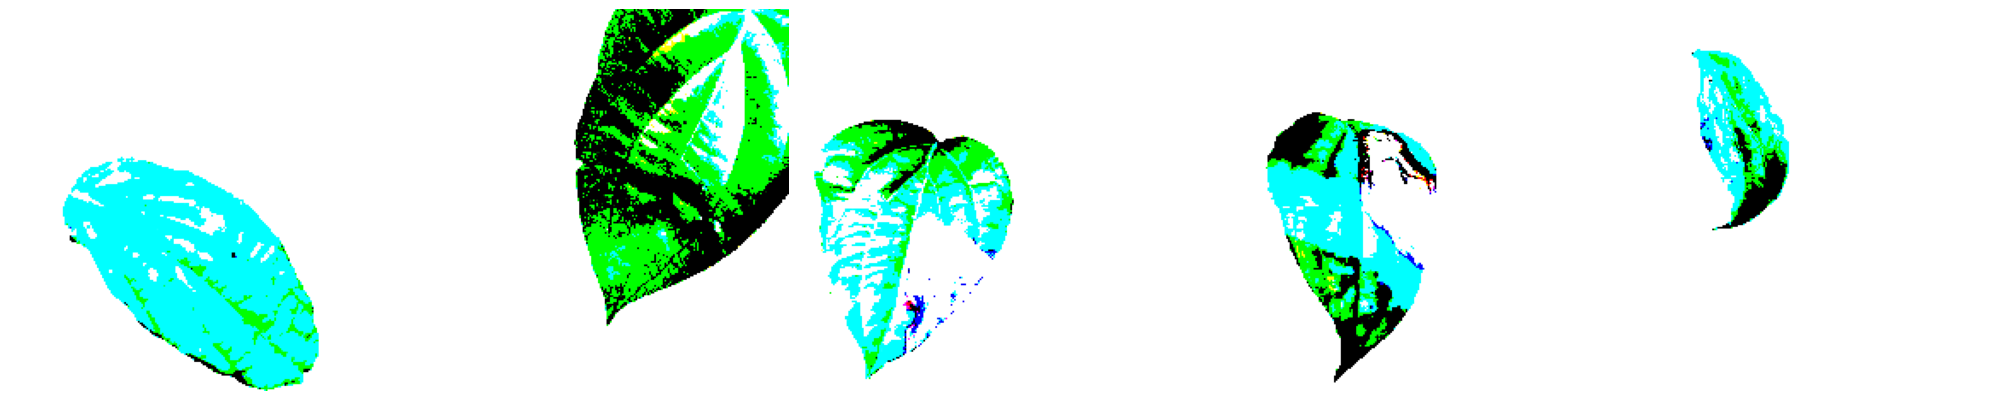

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
resnet50_model = tf.keras.applications.resnet.ResNet50()

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
x = resnet50_model.layers[-1].output
output = Dense(units=3, activation='softmax')(x)

In [ ]:
model = Model(inputs=resnet50_model.input, outputs=output)

In [ ]:
for layer in model.layers[:-23]:
  layer.trainable=False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(learning_rate=0.0001),
  metrics=['accuracy']
)

In [ ]:
model_path = '/content/drive/MyDrive/Models/Trained_Models/resnet.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=2, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [16]:
history = model.fit(x=train_batches,
  validation_data=valid_batches,
  epochs=10,
  callbacks=callbacks_list
)

Epoch 1/10
115/115 [==============================] - ETA: 0s - loss: 1.0295 - accuracy: 0.9592
Epoch 1: val_accuracy improved from -inf to 0.99617, saving model to /content/drive/MyDrive/Models/Trained_Models/resnet.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


115/115 [==============================] - 1170s 10s/step - loss: 1.0295 - accuracy: 0.9592 - val_loss: 1.0053 - val_accuracy: 0.9962
Epoch 2/10
115/115 [==============================] - ETA: 0s - loss: 0.9976 - accuracy: 0.9934
Epoch 2: val_accuracy improved from 0.99617 to 1.00000, saving model to /content/drive/MyDrive/Models/Trained_Models/resnet.h5
115/115 [==============================] - 1087s 9s/step - loss: 0.9976 - accuracy: 0.9934 - val_loss: 0.9882 - val_accuracy: 1.0000
Epoch 3/10
115/115 [==============================] - ETA: 0s - loss: 0.9809 - accuracy: 0.9978
Epoch 3: val_accuracy did not improve from 1.00000
115/115 [==============================] - 1134s 10s/step - loss: 0.9809 - accuracy: 0.9978 - val_loss: 0.9727 - val_accuracy: 1.0000
Epoch 4/10
115/115 [==============================] - ETA: 0s - loss: 0.9660 - accuracy: 0.9975
Epoch 4: val_accuracy did not improve from 1.00000
115/115 [==============================] - 1077s 9s/step - loss: 0.9660 - accuracy

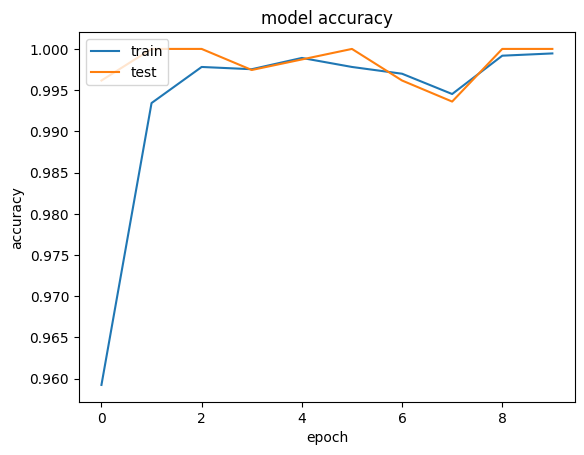

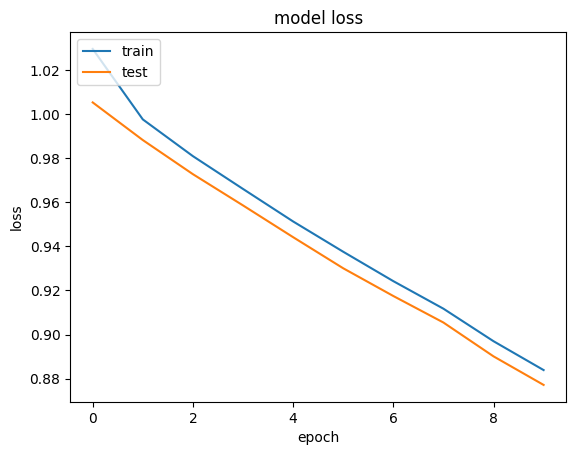

In [17]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
test_batches.class_indices

{'healthy': 0, 'leaf_blight': 1, 'yellow_mottle_virus': 2}

Confusion matrix, without normalization
[[261   0   0]
 [  0 262   1]
 [  0   0 263]]


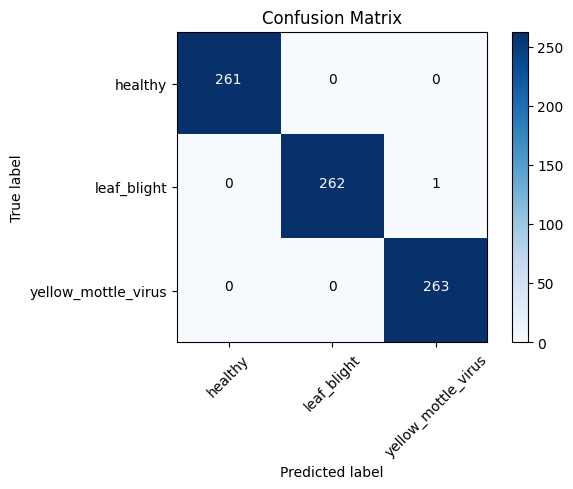

In [22]:
cm_plot_labels=['healthy', 'leaf_blight', 'yellow_mottle_virus']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [23]:
from sklearn.metrics import classification_report
cr = classification_report(y_true=test_labels, y_pred=predictions.argmax(axis=1), target_names=cm_plot_labels)
print(cr)


                     precision    recall  f1-score   support

            healthy       1.00      1.00      1.00       261
        leaf_blight       1.00      1.00      1.00       263
yellow_mottle_virus       1.00      1.00      1.00       263

           accuracy                           1.00       787
          macro avg       1.00      1.00      1.00       787
       weighted avg       1.00      1.00      1.00       787



In [24]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_batches)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

25/25 [==============================] - 164s 6s/step - loss: 0.8776 - accuracy: 0.9987
Test Loss: 0.8776295781135559
Test Accuracy: 0.9987293481826782
